In [82]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [83]:
# filtering the warnings
import warnings
warnings.filterwarnings('ignore')

# Defining the problem statement
Create a ML model which can predict the number of bikes which will be rented at a given hour of the day
* Target Variable: cnt
* Predictors: holiday, weather, registered users etc.

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

In [84]:
# Reading the day.csv file into dataframe
path = 'day.csv'
bike = pd.read_csv(path)

print('\n','Shape of the DataFrame : ',bike.shape,'\n')

bike.head(3)


 Shape of the DataFrame :  (730, 16) 



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [85]:
# Droping the Duplicates rows if any
bike = bike.drop_duplicates()
bike.shape

(730, 16)

# Basic Data Exploration

In [86]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [88]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [89]:
# Statistical summary
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [90]:
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Observations on the dataset

- The shape of the dataset is 730 rows and 16 column
- temp, atemp , hum , windspeed - are continues variables
- casuals, registered and cnt are ordinal-numerical variables
- dteday is the date of record (object data type)
- all other columns are categorical varibles (numeric datatype)

# Cleaning the Data

- Handling the missing values
- Drop off the unnecessary columns
- Handling of outliers
- Correction/conversion Data Types

In [91]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Observation
There is no missing values in the dataframe

### Drop off unnecessary columns

The below mentioned columns can be removed based on the understanding from the data dictionary

- instant : It is the serial number columsn and does not hold any effect on the other variables
- dteday : the date of the record , we already have columns for yaer and months - this can be consireded as reduntant column
- casual & registerd : we have the cnt as the total numbers of bike usage and the objective of the exercie is to find other the parameters which realted to the overall count of the bike users, and not by sepcific category of registration

In [92]:
drop_cols = ['instant', 'dteday','casual', 'registered']
bike = bike.drop(columns = drop_cols)
bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349


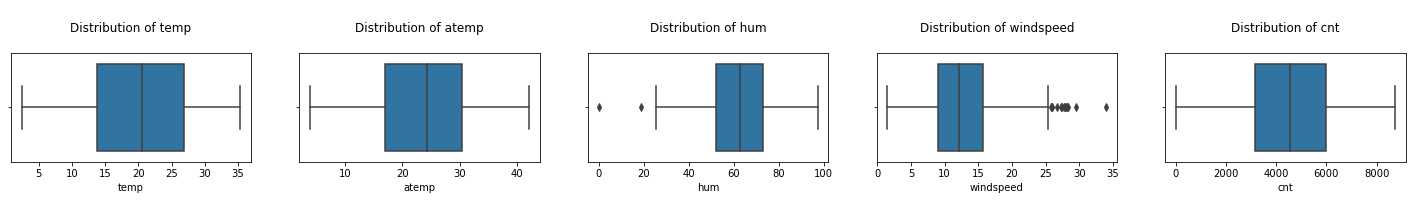

In [93]:
numerical_cols = ['temp','atemp','hum', 'windspeed','cnt'] # Selecting the numerical columns

plt.figure(figsize =[25,2])
for i,var in enumerate(numerical_cols):
    
    plt.subplot(1,5,i+1) # plotting the numerical variables in a a box plot for finding the outliers
    sns.boxplot(bike[var])
    plt.title('\nDistribution of ' +var+ '\n')

plt.show()

### Observation

- There are no considable outliers in the dataset

In [94]:
## Rechecking the datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


### Observation

- All the variables datatypes looks good , not requires any kind of conversions

# Dealing the categorical Columns

In [95]:
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
bike[cat_cols].nunique().sort_values()

yr             2
holiday        2
workingday     2
weathersit     3
season         4
weekday        7
mnth          12
dtype: int64

Binary Columns - No Dummy Columns required

- yr
- holiday
- workingday

Non - Binary category variables - required Dummy Columns

- mnth 
- season
- weekday
- weathersit

In [96]:
# converting the non-binary category variables into categories
non_binary_cat_cols = ['season','mnth','weekday','weathersit']

for i in non_binary_cat_cols :
    bike[i] = bike[i].astype('category')
    
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [97]:
### Getting Dummy columsn for the non-binary category columns, using the pd.get_dummies method
bike_structured = pd.get_dummies(bike, drop_first = True)
bike_structured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

# Exploratory Data Analysis

### Distribution of the Target Variable , ie 'cnt'

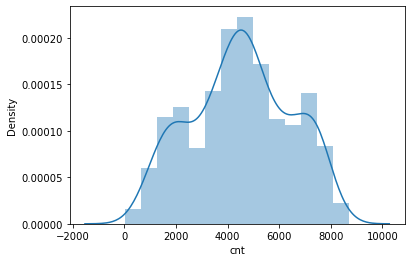

In [98]:
sns.distplot(bike_structured['cnt'])
plt.show()

### Observation
The distribution of the target variable is near to a normal distribition which is satisfactory.

### Pairplot on the numeric variables

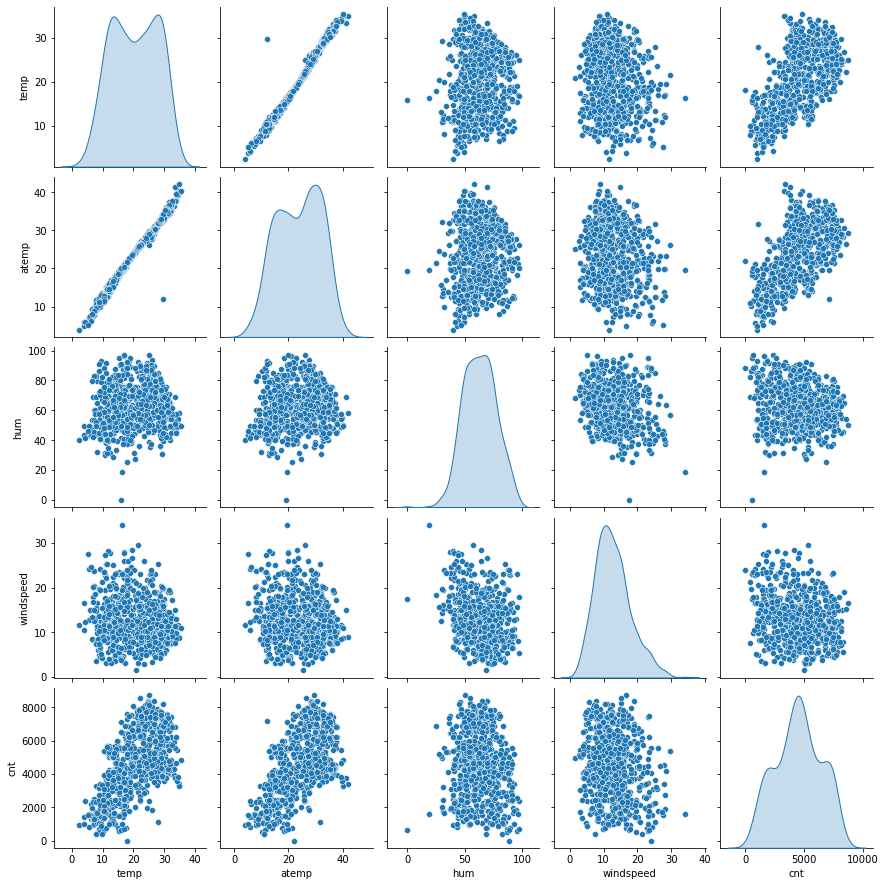

In [99]:
numerical_cols = ['temp','atemp','hum', 'windspeed','cnt']

sns.pairplot(bike_structured[numerical_cols], diag_kind = 'kde')
plt.show()

### Observation 

- temp, atemp, cnt hold a clear linear realtionships

### Distribution of Numerical Variables

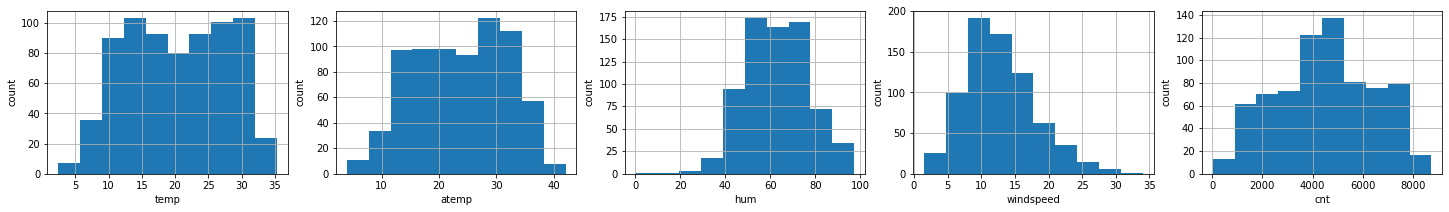

In [100]:
plt.figure(figsize = [25,3])
for i,var in enumerate(numerical_cols):
    plt.subplot(1,5,i+1)
    bike_structured[var].hist()
    plt.xlabel(var)
    plt.ylabel('count')
plt.show()

### Ploting the categorcal variables

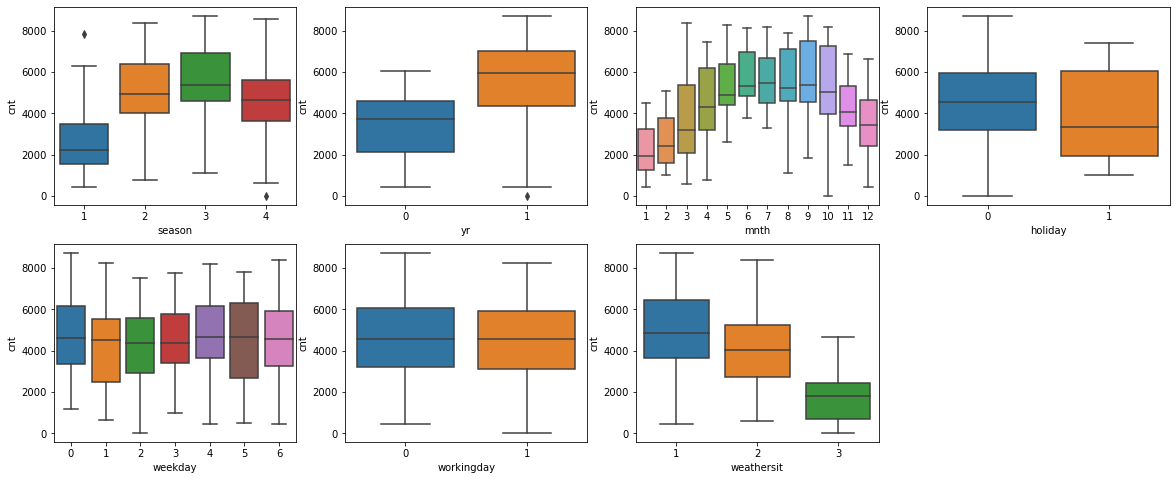

In [101]:
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize = [20,8])
for i, var in enumerate(cat_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(data = bike , x = var , y = 'cnt')
plt.show()

In [102]:
def distribution_func (var):
    s = bike.groupby(var)['cnt'].sum().rename('sum of count')
    p = (s.div(s.sum())*100).round(2).rename('perc_distribution')
    m = bike.groupby(var)['cnt'].median().rename('median')
    df = pd.concat([s,p,m],axis = 1).reset_index()
    df.sort_values(by = 'perc_distribution', ascending = False, inplace = True)
    return (df)

In [103]:
distribution_func('season')

,season,sum of count,perc_distribution,median
2,3,1061129,32.24,5353.5
1,2,918589,27.91,4941.5
3,4,841613,25.57,4634.5
0,1,469514,14.27,2222.5


In [104]:
distribution_func('yr')

,yr,sum of count,perc_distribution,median
1,1,2047742,62.23,5936.0
0,0,1243103,37.77,3740.0


In [105]:
distribution_func('mnth')

,mnth,sum of count,perc_distribution,median
7,8,351194,10.67,5229.5
5,6,346342,10.52,5308.5
8,9,345991,10.51,5384.0
6,7,344948,10.48,5446.5
4,5,331686,10.08,4890.5
9,10,322352,9.80,5013.0
3,4,269094,8.18,4293.5
10,11,254831,7.74,4081.0
2,3,228920,6.96,3216.5
11,12,211036,6.41,3444.0


In [106]:
distribution_func('holiday')

,holiday,sum of count,perc_distribution,median
0,0,3212410,97.62,4563.0
1,1,78435,2.38,3351.0


In [107]:
distribution_func('weekday')

,weekday,sum of count,perc_distribution,median
4,4,487923,14.83,4676.0
0,0,485235,14.74,4590.5
6,6,481176,14.62,4572.0
5,5,478132,14.53,4642.5
3,3,462276,14.05,4350.0
2,2,448822,13.64,4381.0
1,1,447281,13.59,4511.0


In [108]:
distribution_func('workingday')

,workingday,sum of count,perc_distribution,median
1,1,2253988,68.49,4544.5
0,0,1036857,31.51,4572.0


In [109]:
distribution_func('weathersit')

,weathersit,sum of count,perc_distribution,median
0,1,2257952,68.61,4844.0
1,2,995024,30.24,4043.0
2,3,37869,1.15,1817.0


### Obseravtions

**season:** Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**yr :** we can see 62% of the booking is happening in the year 1

**mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.


**holiday:** Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**weekday:** weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

**workingday:** Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

**weathersit:** Almost 68% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.


### Correlation Between The Numerical Variables

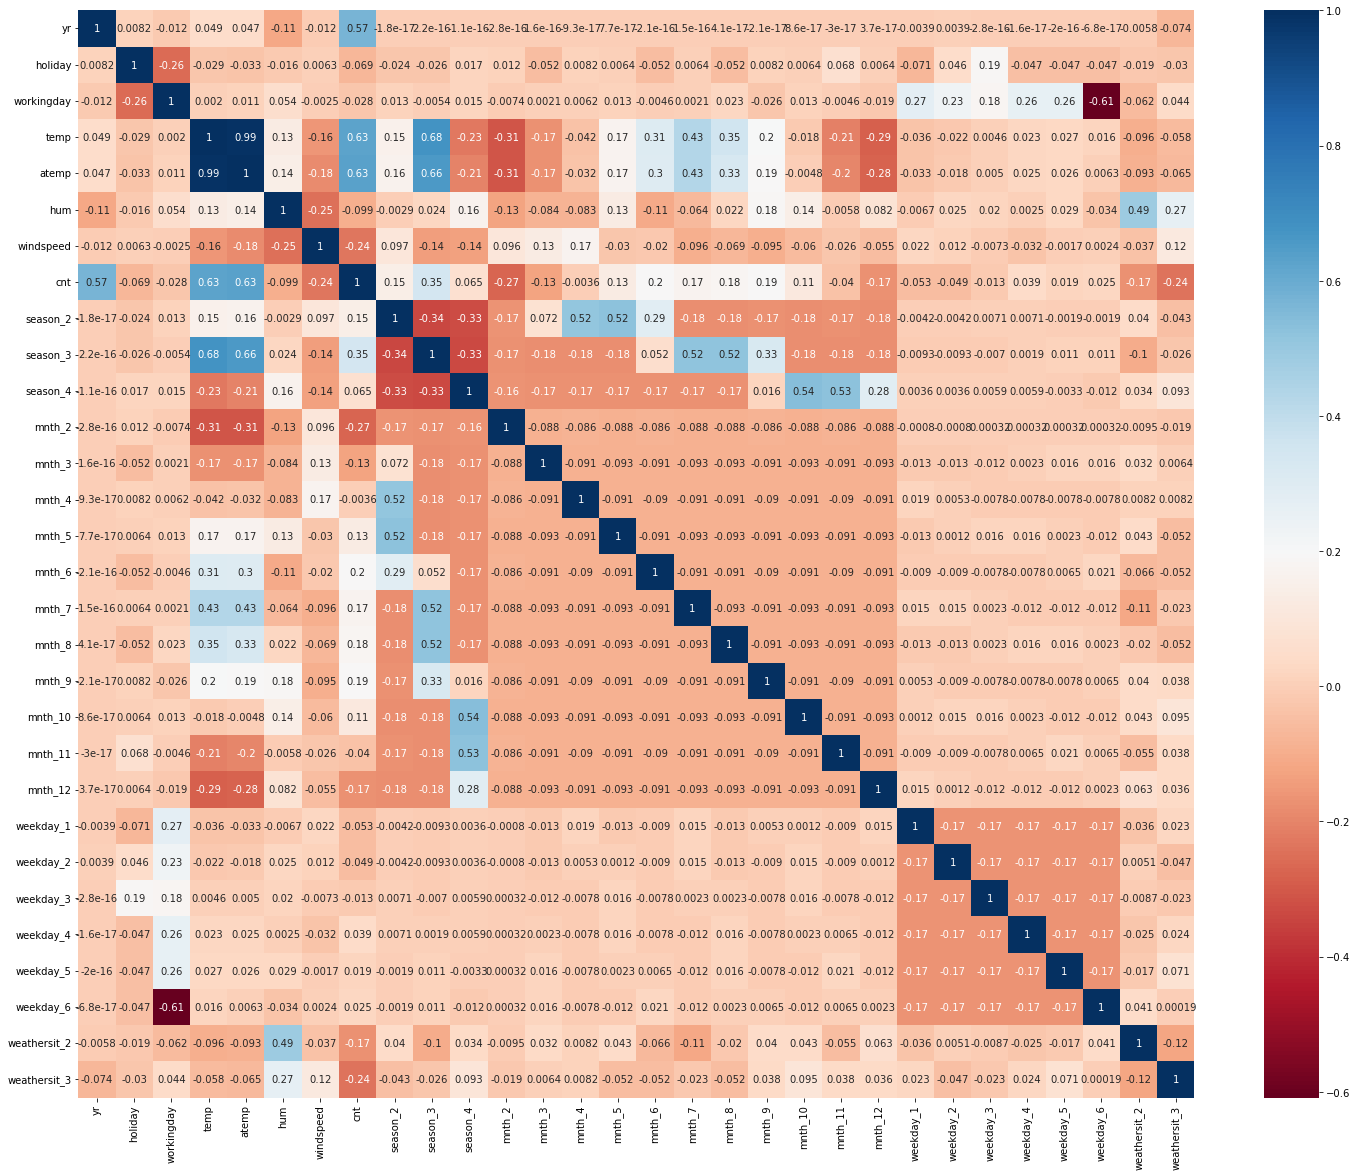

In [110]:
cor = bike_structured.corr()
plt.figure(figsize = [25,20])
sns.heatmap(cor, cmap = 'RdBu', annot = True)
plt.show()

In [111]:
cor_table = cor.melt(ignore_index = False).reset_index()
cor_table = cor_table[~(cor_table['index'] == cor_table['variable'])]
                      
cor_table['duplicate_filter'] = cor_table[['index','variable']].values.tolist()
cor_table['duplicate_filter'].apply(lambda x : x.sort())
cor_table = cor_table[~cor_table['duplicate_filter'].duplicated(keep = 'first')]

cor_table['corr_direction'] = cor_table['value'].apply(lambda x : 'Negative' if x  < 0 else ('No Correlation' if x  == 0 else 'Positive') )
cor_table['abs_corr_value'] = cor_table['value'].abs()
cor_table = cor_table.sort_values(by = 'abs_corr_value', ascending = False)
cor_table = cor_table[['index','variable','value','abs_corr_value','corr_direction']]
top_10_corr = cor_table.head(10)
print('\nTop10 Correlations\n')
top_10_corr


Top10 Correlations



,index,variable,value,abs_corr_value,corr_direction
94,atemp,temp,0.991696,0.991696,Positive
99,season_3,temp,0.678283,0.678283,Positive
129,season_3,atemp,0.655757,0.655757,Positive
127,cnt,atemp,0.630685,0.630685,Positive
97,cnt,temp,0.627044,0.627044,Positive
87,weekday_6,workingday,-0.608682,0.608682,Negative
7,cnt,yr,0.569728,0.569728,Positive
319,mnth_10,season_4,0.536497,0.536497,Positive
320,mnth_11,season_4,0.526984,0.526984,Positive
254,mnth_5,season_2,0.524801,0.524801,Positive


Insights:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.


# Splitting the Train-Test Dataset

- Using Train_test_split form sklearn.model_selection
- ranom state is 100
- training dataset is 70%

In [112]:
train_df, test_df = train_test_split(bike_structured, train_size = 0.7, random_state = 100)

In [113]:
print('\nTraining DataSet Shape : ',train_df.shape)
print('\nTesting DataSet Shape : ',test_df.shape)


Training DataSet Shape :  (510, 30)

Testing DataSet Shape :  (220, 30)


# Scaling of DataFrame

- using sklearn.preprocessing - MinMaxScaler

In [114]:
scaler = MinMaxScaler()

In [115]:
numerical_cols = ['temp','atemp','hum', 'windspeed','cnt']

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
train_df[numerical_cols].head()

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [116]:
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building - Multi Linear Regression

### Defining the dependant and Predictor variables

In [117]:
y_train = train_df.pop('cnt')
X_train = train_df

### Feature Selection using RFE

In [118]:
lm = LinearRegression()
# Linear regression object

In [119]:
lm.fit(X_train,y_train)
#fitting the X_train and y_train to the model

LinearRegression()

In [120]:
# Using RFE for feature selection with 15 features - Creating a RFE object and fitting the data into train dataset into it
RFE_obj  = RFE(estimator = lm,n_features_to_select = 15)
RFE_obj = RFE_obj.fit(X_train,y_train)

In [121]:
# Displaying the RFE output
list(zip(X_train.columns,RFE_obj.support_,RFE_obj.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [122]:
# Selecting the relevant columns
RFE_cols = X_train.columns[RFE_obj.support_]

In [123]:
# sub-setting the RFE - relevant columns to the X_train dataset
X_train_RFE = X_train[RFE_cols]
X_train_RFE.head()

,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1,0


# Buiding the Model using the stats Model

### Checking (VIF) Variance Inflation factor

### UDF for VIF

In [124]:
# Defining a user-defined function for arriving a vif of the selected variables

def vif_func(train_data):

    vif = pd.DataFrame()
    vif['Features'] = train_data.columns
    vif['VIF'] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### UDF for Model Training

In [125]:
# defining a user definfed function to train the model

def stats_moodel_train (train_data):
    X_train_lm = sm.add_constant(X_train_RFE) # Adding constant to the train data set as statsmodel assumes constaant as zero by default
    return sm.OLS(y_train, X_train_lm).fit() # Training the model on OLS 

MODEL_1

In [126]:
# callng the vif_func on the arraived the X_train_RFE
vif_func(X_train_RFE)

,Features,VIF
2,temp,24.63
3,hum,15.53
6,season_3,8.80
4,windspeed,3.81
5,season_2,3.75
7,season_4,3.11
13,weathersit_2,2.15
0,yr,2.05
10,mnth_8,1.85
9,mnth_5,1.68


In [127]:
lr1 = stats_moodel_train(X_train_RFE)
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          1.00e-188
Time:                        23:48:47   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665      0.000       0.184       0.291
yr               0.2304      0.008     28.453      0.000       0.215       0.246
holiday         -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp             0.4869      0.034     14.119      0.000       0.419       0.555
hum             -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed       -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2         0.1166      0.015      7.527      0.000       0.086       0.147
season_3         0.0425      0.023      1.847      0.065      -0.003       0.088
season_4         0.1530      0.014     10.801      0.000       0.125       0.181
mnth_3           0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5           0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8           0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9           0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10          0.0407      0.018      2.314      0.021       0.006       0.075
weathersit_2    -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_3    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL_2

- Removing the hum variable having high IVF value

- eventhough the hum is the second hugest among the IFV, preserving temp variable as that could be better predictor in business terms

In [128]:
X_train_RFE = X_train_RFE.drop(columns = 'hum')

In [129]:
vif_func(X_train_RFE)

,Features,VIF
2,temp,16.00
5,season_3,8.42
4,season_2,3.70
3,windspeed,3.46
6,season_4,2.94
0,yr,2.04
9,mnth_8,1.85
8,mnth_5,1.67
11,mnth_10,1.61
12,weathersit_2,1.51


In [130]:
lr2 = stats_moodel_train(X_train_RFE)
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          3.97e-185
Time:                        23:48:47   Log-Likelihood:                 502.66
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     495   BIC:                            -911.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1356      0.017      7.823      0.000       0.102       0.170
yr               0.2345      0.008     28.504      0.000       0.218       0.251
holiday         -0.0899      0.026     -3.452      0.001      -0.141      -0.039
temp             0.4530      0.034     13.147      0.000       0.385       0.521
windspeed       -0.1498      0.025     -5.952      0.000      -0.199      -0.100
season_2         0.1229      0.016      7.797      0.000       0.092       0.154
season_3         0.0554      0.023      2.373      0.018       0.010       0.101
season_4         0.1485      0.014     10.286      0.000       0.120       0.177
mnth_3           0.0339      0.015      2.259      0.024       0.004       0.063
mnth_5           0.0173      0.018      0.960      0.338      -0.018       0.053
mnth_8           0.0450      0.018      2.528      0.012       0.010       0.080
mnth_9           0.1101      0.018      6.293      0.000       0.076       0.145
mnth_10          0.0373      0.018      2.076      0.038       0.002       0.073
weathersit_2    -0.0822      0.009     -9.352      0.000      -0.099      -0.065
weathersit_3    -0.2919      0.025    -11.746      0.000      -0.341      -0.243
==============================================================================
Omnibus:                       72.480   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.779
Skew:                          -0.737   Prob(JB):                     6.76e-39
Kurtosis:                       5.470   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL_3

- Removing the variable 'season3' based on its Very High 'VIF' value.

In [131]:
X_train_RFE = X_train_RFE.drop(columns = 'season_3')

In [132]:
vif_func(X_train_RFE)

,Features,VIF
2,temp,5.22
3,windspeed,3.33
4,season_2,2.31
0,yr,2.02
5,season_4,1.97
8,mnth_8,1.62
7,mnth_5,1.61
10,mnth_10,1.59
11,weathersit_2,1.51
9,mnth_9,1.35


In [133]:
lr3 = stats_moodel_train(X_train_RFE)
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          4.53e-185
Time:                        23:48:47   Log-Likelihood:                 499.77
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     496   BIC:                            -912.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1285      0.017      7.492      0.000       0.095       0.162
yr               0.2329      0.008     28.274      0.000       0.217       0.249
holiday         -0.0928      0.026     -3.550      0.000      -0.144      -0.041
temp             0.5148      0.023     22.674      0.000       0.470       0.559
windspeed       -0.1536      0.025     -6.085      0.000      -0.203      -0.104
season_2         0.0998      0.012      8.007      0.000       0.075       0.124
season_4         0.1310      0.012     10.496      0.000       0.106       0.156
mnth_3           0.0258      0.015      1.760      0.079      -0.003       0.055
mnth_5           0.0091      0.018      0.508      0.611      -0.026       0.044
mnth_8           0.0597      0.017      3.555      0.000       0.027       0.093
mnth_9           0.1230      0.017      7.359      0.000       0.090       0.156
mnth_10          0.0310      0.018      1.736      0.083      -0.004       0.066
weathersit_2    -0.0822      0.009     -9.311      0.000      -0.100      -0.065
weathersit_3    -0.2882      0.025    -11.565      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.809
Skew:                          -0.665   Prob(JB):                     1.96e-30
Kurtosis:                       5.161   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL_4

-- Removing month_5 having high p-value

In [134]:
X_train_RFE = X_train_RFE.drop(columns = 'mnth_5')

In [135]:
vif_func(X_train_RFE)

,Features,VIF
2,temp,5.11
3,windspeed,3.30
0,yr,2.01
5,season_4,1.96
4,season_2,1.83
7,mnth_8,1.61
9,mnth_10,1.59
10,weathersit_2,1.50
8,mnth_9,1.34
6,mnth_3,1.19


In [136]:
lr4 = stats_moodel_train(X_train_RFE)
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          3.47e-186
Time:                        23:48:47   Log-Likelihood:                 499.64
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     497   BIC:                            -918.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1285      0.017      7.500      0.000       0.095       0.162
yr               0.2327      0.008     28.307      0.000       0.217       0.249
holiday         -0.0930      0.026     -3.563      0.000      -0.144      -0.042
temp             0.5159      0.023     22.852      0.000       0.472       0.560
windspeed       -0.1546      0.025     -6.147      0.000      -0.204      -0.105
season_2         0.1027      0.011      9.265      0.000       0.081       0.125
season_4         0.1309      0.012     10.495      0.000       0.106       0.155
mnth_3           0.0247      0.015      1.702      0.089      -0.004       0.053
mnth_8           0.0590      0.017      3.528      0.000       0.026       0.092
mnth_9           0.1225      0.017      7.347      0.000       0.090       0.155
mnth_10          0.0308      0.018      1.728      0.085      -0.004       0.066
weathersit_2    -0.0819      0.009     -9.306      0.000      -0.099      -0.065
weathersit_3    -0.2883      0.025    -11.580      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       61.567   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.060
Skew:                          -0.666   Prob(JB):                     7.75e-30
Kurtosis:                       5.129   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL_5

-- Removing month_3 having high p-value

In [137]:
X_train_RFE = X_train_RFE.drop(columns = 'mnth_3')

In [138]:
vif_func(X_train_RFE)

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.93
4,season_2,1.83
6,mnth_8,1.59
8,mnth_10,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.10


In [139]:
lr5 = stats_moodel_train(X_train_RFE)
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          9.45e-187
Time:                        23:48:47   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1346      0.017      8.014      0.000       0.102       0.168
yr               0.2329      0.008     28.281      0.000       0.217       0.249
holiday         -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp             0.5099      0.022     22.823      0.000       0.466       0.554
windspeed       -0.1517      0.025     -6.035      0.000      -0.201      -0.102
season_2         0.1026      0.011      9.237      0.000       0.081       0.124
season_4         0.1266      0.012     10.345      0.000       0.103       0.151
mnth_8           0.0569      0.017      3.406      0.001       0.024       0.090
mnth_9           0.1208      0.017      7.245      0.000       0.088       0.154
mnth_10          0.0311      0.018      1.741      0.082      -0.004       0.066
weathersit_2    -0.0820      0.009     -9.299      0.000      -0.099      -0.065
weathersit_3    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL_6

-- Removing month_10 having high p-value

In [140]:
X_train_RFE = X_train_RFE.drop(columns = 'mnth_10')

In [141]:
vif_func(X_train_RFE)

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.82
6,mnth_8,1.58
8,weathersit_2,1.49
5,season_4,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


In [142]:
lr6 = stats_moodel_train(X_train_RFE)
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          2.62e-187
Time:                        23:48:47   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837      0.000       0.098       0.163
yr               0.2326      0.008     28.191      0.000       0.216       0.249
holiday         -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp             0.5173      0.022     23.546      0.000       0.474       0.561
windspeed       -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2         0.1012      0.011      9.116      0.000       0.079       0.123
season_4         0.1371      0.011     12.843      0.000       0.116       0.158
mnth_8           0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9           0.1163      0.017      7.046      0.000       0.084       0.149
weathersit_2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL_7

-- Removing month_8 having high p-value

In [143]:
X_train_RFE = X_train_RFE.drop(columns = 'mnth_8')

In [144]:
vif_func(X_train_RFE)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_2,1.57
7,weathersit_2,1.48
5,season_4,1.37
6,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.04


In [145]:
lr7 = stats_moodel_train(X_train_RFE)
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          2.83e-186
Time:                        23:48:47   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1259      0.017      7.508      0.000       0.093       0.159
yr               0.2329      0.008     27.962      0.000       0.216       0.249
holiday         -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp             0.5480      0.020     27.360      0.000       0.509       0.587
windspeed       -0.1532      0.025     -6.039      0.000      -0.203      -0.103
season_2         0.0881      0.010      8.437      0.000       0.068       0.109
season_4         0.1293      0.011     12.314      0.000       0.109       0.150
mnth_9           0.1012      0.016      6.330      0.000       0.070       0.133
weathersit_2    -0.0784      0.009     -8.844      0.000      -0.096      -0.061
weathersit_3    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Inference Model Creation

1. This Model ( Model 7 ) is good
2. All the VIF values are less than 5
3. and the p - value of each co-effices is zero

# The Equation of the best fitted Hyperplane

 y = 0.1259 + ( 0.2329 * yr ) - ( 0.0987 * holiday ) + ( 0.548 * temp ) - ( 0.1532 * windspeed ) + ( 0.0881 * season_2 ) + ( 0.1293 * season_4 ) + ( 0.1012  * month_9 ) - ( 0.0784 * weathersit_2 ) - ( 0.2829 * weathersit_3 )

# Significants of the Model

1. F-Statistics - Significants of the overall Model
2. P value - Significants of the co-efficents
3. Adjusted R-Squared - Significants of the fit
4. VIF - Muti-collinearity between the predictor variables

1. The F-Statistics value of 271.9 (which is greater than 1 & Prob (F-statistic): 2.83e-186) hence the overall model is significant

2. The p-value of all variables are '~0.0000' states that the co-efficents are significants
 
3. R-Squared(Adjusted) is 82.7% , hence the fit is able to explain 82.7% of the varinace hence the fit is also very good.

4. All the VIF values are less than 5, so, there no multi-collinearity between the preditor varibles

# Evaluating the Assumptions on Linear Regression

1. Error Terms are Normally Distributed
2. No Relations between error terms and X

In [146]:
X_train_const =  sm.add_constant(X_train_RFE)

y_train_pred = lr7.predict(X_train_const)

y_train_pred.head()

576    0.764943
426    0.483717
728    0.391485
482    0.556437
111    0.266762
dtype: float64

In [147]:
res = y_train - y_train_pred

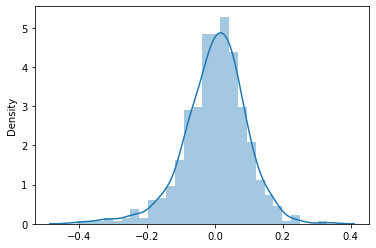

In [148]:
sns.distplot(res)
plt.show()

Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

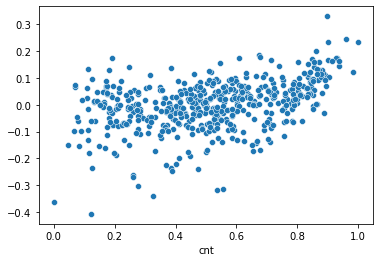

In [149]:
sns.scatterplot(y_train,res)
plt.show()

No Visible pattern between the Error Terms and y-train , so the assumption stands |

# Prediction from the Selected Model

In [150]:
numerical_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [151]:
test_df[numerical_cols].head(3)

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659


In [152]:
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Scaling the testing dataframe numerical varibales

In [153]:
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Independant Variable
- Predictor Variable

In [154]:
# Splitting X-test & y-test 

y_test = test_df.pop('cnt')
X_test = test_df
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

- Selecting the columns for the last model

In [155]:
# Selectig the columns of the final model, which is selected for prediction

model_cols = X_train_RFE.columns

In [156]:
X_test = X_test[model_cols]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   temp          220 non-null    float64
 3   windspeed     220 non-null    float64
 4   season_2      220 non-null    uint8  
 5   season_4      220 non-null    uint8  
 6   mnth_9        220 non-null    uint8  
 7   weathersit_2  220 non-null    uint8  
 8   weathersit_3  220 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 9.7 KB


In [157]:
# Adding constant to the testing dataset

X_test_const = sm.add_constant(X_test)
X_test_const.head()

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_2,weathersit_3
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [158]:
y_pred = lr7.predict(X_test_const)

### Model Evaluation

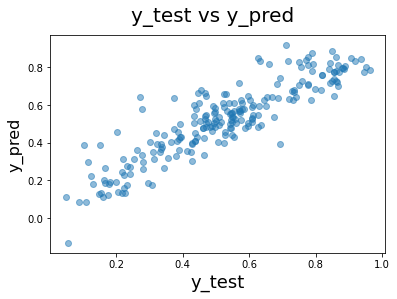

In [159]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha = 0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

Seems like a very good prediction in the test dataset

### Adjusted R-Square Value for TEST

In [160]:
# looking at the r-squared value

r2 = r2_score(y_test, y_pred)
r2

0.7941977535477243

In [161]:
print(X_test.shape)

(220, 9)


In [162]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7853776572711981

### R-Squared Comparison

* Train R-Squared :0.830
* Train Adjusted R^2 :0.827

* Test R-Squared :0.794
* Test Adjusted R^2 :0.785

* This seems to be a really good model that can very well 'Generalize' various datasets.

# Final Co-efficients

* const : 0.1259
* yr : 0.2329
* holiday : -0.0987
* temp : 0.548
* windspeed : -0.1532
* season_2 : 0.0881
* season_4 : 0.1293
* mnth_9 : 0.1012
* weathersit_2 : -0.0784
* weathersit_3 : -0.2829



# End of the Notebook